In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
##diambil data sebanyak 76000
may_18 = pd.read_csv("2018-05_bme280sof.csv",nrows=76000)
may_18.head()

,Unnamed: 0,sensor_id,location,lat,lon,timestamp,pressure,temperature,humidity
0,0,6349,3207,42.648,23.406,2018-05-01T00:00:00,94897.48,14.71,63.67
1,8,5663,2854,42.692,23.364,2018-05-01T00:00:03,95028.52,17.92,63.85
2,9,4471,2248,42.698,23.291,2018-05-01T00:00:03,95123.77,16.62,71.24
3,14,6196,3131,42.631,23.382,2018-05-01T00:00:04,94378.52,15.83,57.25
4,15,11834,5976,42.707,23.363,2018-05-01T00:00:04,95371.45,16.18,65.41


In [4]:
may_18_dr = may_18.drop(["Unnamed: 0"], axis = 1)
may_18_dr.head()

,sensor_id,location,lat,lon,timestamp,pressure,temperature,humidity
0,6349,3207,42.648,23.406,2018-05-01T00:00:00,94897.48,14.71,63.67
1,5663,2854,42.692,23.364,2018-05-01T00:00:03,95028.52,17.92,63.85
2,4471,2248,42.698,23.291,2018-05-01T00:00:03,95123.77,16.62,71.24
3,6196,3131,42.631,23.382,2018-05-01T00:00:04,94378.52,15.83,57.25
4,11834,5976,42.707,23.363,2018-05-01T00:00:04,95371.45,16.18,65.41


In [5]:
may_18_dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_id    76000 non-null  int64  
 1   location     76000 non-null  int64  
 2   lat          76000 non-null  float64
 3   lon          76000 non-null  float64
 4   timestamp    76000 non-null  object 
 5   pressure     76000 non-null  float64
 6   temperature  76000 non-null  float64
 7   humidity     76000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 4.6+ MB


In [6]:
may_18_dr.location.value_counts()

2970    281
3128    281
3508    280
5837    280
1120    280
       ... 
1313     44
3847     39
4999     39
1931     39
3041     24
Name: location, Length: 293, dtype: int64

In [7]:
data_may18 = pd.DataFrame(may_18_dr[may_18_dr.location.isin([1729, 2914, 3250, 4884, 5351, 6118])])
data_may18

,sensor_id,location,lat,lon,timestamp,pressure,temperature,humidity
9,6435,3250,42.694,23.277,2018-05-01T00:00:05,94871.23,17.51,64.78
12,9690,4884,42.614,23.340,2018-05-01T00:00:06,92547.42,15.21,56.33
20,5777,2914,42.668,23.346,2018-05-01T00:00:07,94496.98,20.60,51.47
45,10608,5351,42.653,23.368,2018-05-01T00:00:14,94816.93,15.86,64.23
53,3432,1729,42.711,23.419,2018-05-01T00:00:21,95411.55,16.29,77.24
...,...,...,...,...,...,...,...,...
75884,5777,2914,42.668,23.346,2018-05-01T19:37:21,94450.80,21.74,47.74
75901,12109,6118,42.685,23.358,2018-05-01T19:37:26,94916.05,22.39,42.55
75918,9690,4884,42.614,23.340,2018-05-01T19:37:35,92537.21,18.79,49.78
75934,6435,3250,42.694,23.277,2018-05-01T19:37:40,94794.30,22.27,45.29


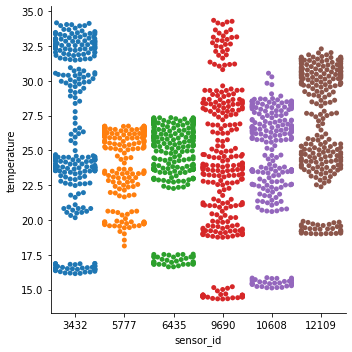

In [8]:
sns.catplot(x="sensor_id", y="temperature", kind="swarm",data=data_may18)

Data dengan sensor id 5777 dan 6435 memiliki variasi kecil diantara sensor id lainnnya dan dapat dikatakan masuk dalam wilayah zona iklim sedang karena memiliki temperatur rata-rata 15-25 derajat,
sedangkan wilayah dengan temperatur variasi yang tinggi berada pada wilayah dengan sensor id 3432 dan 9690 yakni kisaran 15-35 derajat.

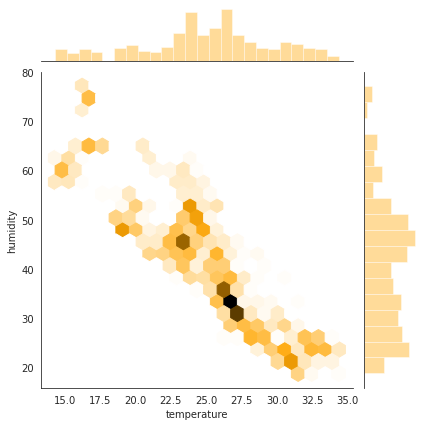

In [9]:
with sns.axes_style("white"):
    sns.jointplot(x="temperature", y="humidity", kind="hex", color="orange", data=data_may18);

Berdasarkan hexbin plot diketahui bahwa antara temperatur dan humidity memiliki hubungan kuat negatif, yang ditandai dengan semakin tinggi nilai temperature maka nilai humidity semakin turun.
Selain itu dapat dilihat penumpukan scatter di temperature 25-27.5 derajat dengan tingkat humidity 30-40. 
Namun demikian, persebaran wilayah paling banyak berada pada suhu dibawah 27.5 derajat.

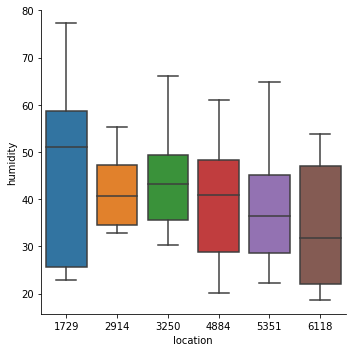

In [10]:
sns.catplot(x="location", y="humidity", kind="box",data=data_may18)

Berdasarkan box plot, data dengan variasi humidity tinggi berada pada wilayah 1729. Humidity ter-extremenya bahkan mendekati angka 80.
Disamping itu, wilayah terdekatnya yaitu 2914 hanya memiliki variasi yang rendah di sekitar angka 35-48. Bahkan humidity tertinggi di wilayah ini tidak sampai dengan nilai Q3 di wilayah 1729.

In [11]:
data_may18_2 = may_18_dr.groupby(["sensor_id"]).mean()
data_may18_2.head()

,location,lat,lon,pressure,temperature,humidity
sensor_id,,,,,,
1472,963,42.644,23.337,94032.233022,25.220216,41.705827
1954,977,42.704,23.354,94995.535876,26.004088,42.881569
1962,981,42.690,23.324,94862.194982,28.217921,41.418172
2036,1023,42.657,23.349,94418.602888,23.675957,54.986823
2038,1024,42.694,23.320,94965.434640,24.964865,44.133559


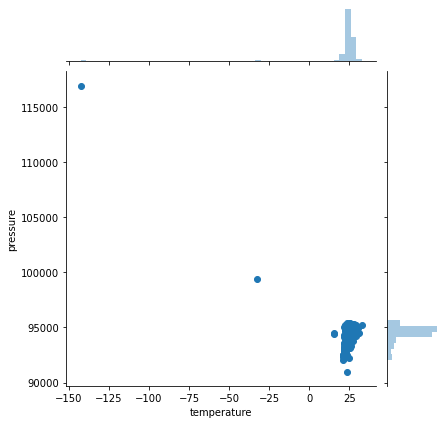

In [12]:
sns.jointplot(x="temperature", y="pressure", data=data_may18_2);

berdasarkan sensor id, kebanyakan wilayah berada pada rata-rata temperatur 25 derajat dengan pressure 90-95 ribu. 
Terdapat wilayah data ter-extreme dengan suhu dibawah 0 yakni -150 derajat.

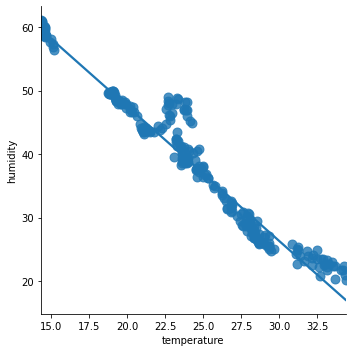

In [13]:
sns.lmplot(x="temperature", y="humidity", data=may_18_dr.query("sensor_id == '9690'"),
           robust=True, ci=None, scatter_kws={"s": 80});

Bentuk model regresi linier sederhana pada sensor id 9690, terlihat masih ada data yang belum linier dan berada pada garis outlier

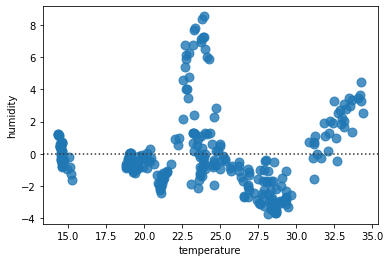

In [14]:
sns.residplot(x="temperature", y="humidity", data=may_18_dr.query("sensor_id == '9690'"),
              scatter_kws={"s": 80});

Nilai residual dari regresi linier sederhana antara temperatur dan humidity pada sensor id 9690 masih ada nilai yang berada jauh dari angka 0, mengartikan bahwa model belum seutuhnya baik.